In [3]:
import pandas as pd
import numpy as np
from scipy.stats import levene, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy import stats 
from statsmodels.stats.anova import anova_lm

In [10]:
data = pd.read_csv(r"C:\Users\DWIGHT JIRO\Downloads\Alzheimers Mice Data.csv")

print(data.columns)


Index(['AD_Status', 'Treatment', 'Training', 'Memory'], dtype='object')


Assumption 1: The dependent variable must be measured on a continuous scale, meaning it should be either an interval or ratio variable.

Assumption 2: The two independent variables must each consist of two or more distinct, independent categories or groups.

Assumption 3: Observations must be independent of each other, indicating that there is no relationship between observations within a group or between different groups.

Assumption 4: There should be no significant outliers in the data.

Assumption 5: The dependent variable should follow a roughly normal distribution within each combination of the groups formed by the two independent variables.

Assumption 6: There must be equal variances (homogeneity of variances) across each combination of the groups formed by the two independent variables.

# Assumption 1:

In [11]:
# Check the type of the dependent variable
dependent_var = 'Training'
independent_vars = ['AD_Status', 'Treatment']

# Check if the dependent variable is continuous (either interval or ratio)
if data[dependent_var].dtype in ['float64', 'int64']:
    print(f"The dependent variable '{dependent_var}' is continuous and quantitative (interval/ratio scale).")
else:
    print(f"The dependent variable '{dependent_var}' is not continuous.")

# Check the data types for independent variables to confirm they are categorical
for var in independent_vars:
    if data[var].dtype == 'object' or data[var].dtype == 'category':
        print(f"The independent variable '{var}' is categorical.")
    else:
        print(f"The independent variable '{var}' is not categorical.")

# Check if the independent variable 'AD_Status' has two levels
if len(data['AD_Status'].unique()) == 2:
    print("\n'AD_Status' has two levels: '1' for Alzheimer's Disease and '2' for No Alzheimer's Disease.")
else:
    print("\n'AD_Status' does not have exactly two levels.")

# Check if the independent variable 'Treatment' has four levels
if len(data['Treatment'].unique()) == 4:
    print("\n'Treatment' has four levels: '1', '2', '3', and '4'.")
else:
    print("\n'Treatment' does not have exactly four levels.")


The dependent variable 'Training' is continuous and quantitative (interval/ratio scale).
The independent variable 'AD_Status' is not categorical.
The independent variable 'Treatment' is not categorical.

'AD_Status' has two levels: '1' for Alzheimer's Disease and '2' for No Alzheimer's Disease.

'Treatment' has four levels: '1', '2', '3', and '4'.


The dependent variable, Training, is measured at the continuous level.

# Assumption 2: 

# Dependent and Independent Variables


The dependent variable was called “Training Day Error ” as this is continuous and
quantitative, since it can be measured on a scale and can take values with decimal places.

Independent Variable:
AD status: This is a categorical variable with two levels such as “1” and “2”. 

1- Alzheimer's Disease
2- No Alzheimer's Disease

treatment: This is also a categorical variable with three levels such as
“1”, “2”, “3” and "4"

# Assumption 3:

Remark. Each observation is independent of each other as there is no relationship between
the observations in each group of the independent variable or between the groups themselves

The independence of observation is observed.

# Assumption 4: 

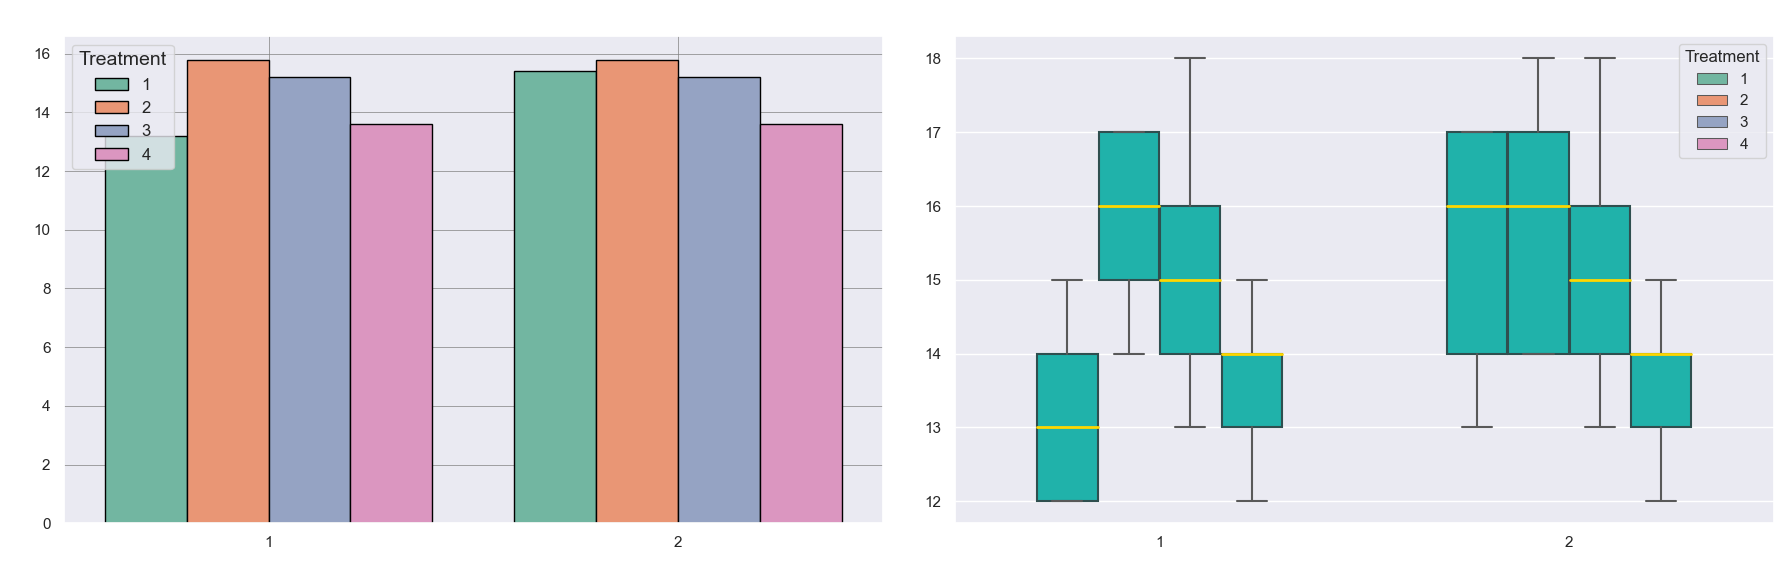

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark, modern style for the plot
sns.set(style="darkgrid", palette="muted")

# Create the figure with a side-by-side subplot layout
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Create a barplot for 'Training' across 'AD_Status' and 'Treatment'
sns.barplot(x='AD_Status', y='Training', hue='Treatment', data=data,
            palette="Set2", ci=None, edgecolor='black', ax=axes[0])

# Customize the barplot title and labels
axes[0].set_title('Training Day Errors by AD Status and Treatment (Barplot)', fontsize=18, fontweight='bold', color='white')
axes[0].set_xlabel('AD Status', fontsize=14, fontweight='bold', color='white')
axes[0].set_ylabel('Training Day Errors', fontsize=14, fontweight='bold', color='white')

# Add a grid and legend to the barplot
axes[0].grid(True, linestyle='-', linewidth=0.5, color='gray')
axes[0].legend(title='Treatment', loc='upper left', fontsize=12, title_fontsize=14)

# Create a boxplot for the same data to detect outliers
sns.boxplot(x='AD_Status', y='Training', hue='Treatment', data=data,
            palette="Set2", ax=axes[1], width=0.6, fliersize=10, linewidth=1.5,
            boxprops=dict(facecolor='lightseagreen', edgecolor='darkslategray'),
            medianprops=dict(color='gold', linewidth=2))

# Customize the boxplot title and labels
axes[1].set_title('Training Day Errors by AD Status and Treatment (Boxplot)', fontsize=18, fontweight='bold', color='white')
axes[1].set_xlabel('AD Status', fontsize=14, fontweight='bold', color='white')
axes[1].set_ylabel('Training Day Errors', fontsize=14, fontweight='bold', color='white')

# Adjust layout to make the plots fit well
plt.tight_layout()

# Show the plot with both barplot and boxplot
plt.show()




### No significant outliers

# Assumption 5: 

In [29]:
from scipy import stats

# Shapiro-Wilk Test for Normality
print("Shapiro-Wilk Test p-values:")
for status in data['AD_Status'].unique():
    for treatment in data['Treatment'].unique():
        subset = data[(data['AD_Status'] == status) & (data['Treatment'] == treatment)]
        p_value = stats.shapiro(subset['Training'])[1]
        print(f"AD Status: {status}, Treatment: {treatment}, p-value: {p_value}")


Shapiro-Wilk Test p-values:
AD Status: 1, Treatment: 1, p-value: 0.4211485683917999
AD Status: 1, Treatment: 2, p-value: 0.4211485683917999
AD Status: 1, Treatment: 3, p-value: 0.9276362061500549
AD Status: 1, Treatment: 4, p-value: 0.8139519691467285
AD Status: 2, Treatment: 1, p-value: 0.25384601950645447
AD Status: 2, Treatment: 2, p-value: 0.3772224485874176
AD Status: 2, Treatment: 3, p-value: 0.9276362061500549
AD Status: 2, Treatment: 4, p-value: 0.8139519691467285


### The dependent variable, training, is approximately normally distributed for each combination of the groups of AD_status and treatment, as assessed by Shapiro-Wilk test of normality, (p > 0.05).

# Assumption 6:

In [30]:
# Levene's Test for Homogeneity of Variance
print("Levene's Test p-value:")

# Group data by AD_Status and Treatment
grouped_data = [group['Training'] for _, group in data.groupby(['AD_Status', 'Treatment'])]

# Perform Levene's Test
stat, p_value = stats.levene(*grouped_data)

print(f"Statistic: {stat}, p-value: {p_value}")



Levene's Test p-value:
Statistic: 0.4346076458752513, p-value: 0.8730505780891101


# Computation

In [56]:
model = ols('Training ~ C(AD_Status) * C(Treatment)', data=data).fit()

# Perform the ANOVA
anova_result = anova_lm(model)

# Display the ANOVA result
print(anova_result)

                             df  sum_sq  mean_sq         F    PR(>F)
C(AD_Status)                1.0   3.025   3.0250  1.216080  0.278356
C(Treatment)                3.0  28.275   9.4250  3.788945  0.019678
C(AD_Status):C(Treatment)   3.0   9.075   3.0250  1.216080  0.319771
Residual                   32.0  79.600   2.4875       NaN       NaN


Key Points:

AD_Status

p-value = 0.278
Interpretation: Not statistically significant (p > 0.05). This means AD_Status (whether the mice have Alzheimer's or not) does not significantly affect Training Day Errors

Treatment

p-value = 0.0197
Interpretation: Statistically significant (p < 0.05). This indicates that Treatment (the different drug treatments) significantly affects Training Day Errors.

Interaction (AD_Status × Treatment)

p-value = 0.3197
Interpretation: Not statistically significant (p > 0.05). This suggests the effect of Treatment on Training Day Errors is not dependent on AD_Status, meaning there is no significant interaction between the two factors.

As Treatment is significant (p-value < 0.05), we can conclude that different treatments result in varying training day errors. However, both AD_Status and the interaction between AD_Status and Treatment are not significant, indicating that AD_Status does not have a notable impact, and the treatments do not vary in their effects based on whether the mice have Alzheimer's.


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      1.5  0.172 -0.4223  3.4223  False
     1      3      0.9 0.5931 -1.0223  2.8223  False
     1      4     -0.7 0.7612 -2.6223  1.2223  False
     2      3     -0.6 0.8347 -2.5223  1.3223  False
     2      4     -2.2 0.0196 -4.1223 -0.2777   True
     3      4     -1.6 0.1314 -3.5223  0.3223  False
----------------------------------------------------


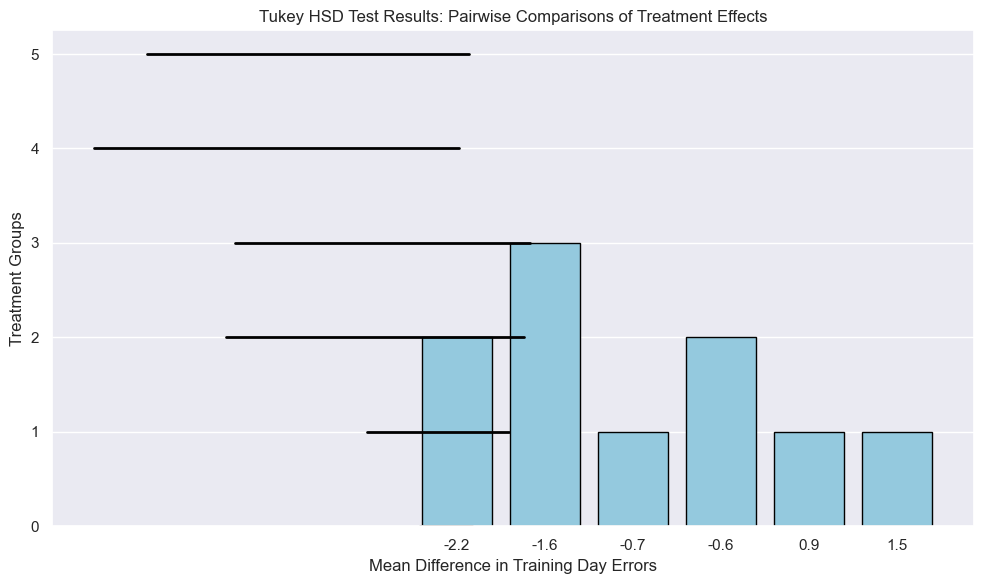

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['Training'], data['Treatment'], alpha=0.05)

# Print the result of Tukey's test
print(tukey_result)

# Extract the Tukey results into a DataFrame
tukey_df = pd.DataFrame(tukey_result.summary().data[1:], columns=["Group1", "Group2", "Mean Difference", "Lower CI", "Upper CI", "P-Value", "Reject"])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for the mean differences with confidence intervals
sns.barplot(x="Mean Difference", y="Group1", data=tukey_df, color='skyblue', edgecolor='black')

# Add the confidence intervals to the plot
for i, row in tukey_df.iterrows():
    plt.plot([row['Lower CI'], row['Upper CI']], [i, i], color='black', lw=2)  # CI line

# Add labels and title
plt.xlabel('Mean Difference in Training Day Errors')
plt.ylabel('Treatment Groups')
plt.title('Tukey HSD Test Results: Pairwise Comparisons of Treatment Effects')

# Show the plot
plt.tight_layout()
plt.show()




Key Insights: 

There is a significant difference in Training Day Errors between Treatment 2 and Treatment 4 (p = 0.0196). This indicates that the effects of Treatment 2 and Treatment 4 on Training Day Errors differ significantly, with Treatment 2 showing a mean 2.2 errors lower than Treatment 4. For all other treatment pairs (e.g., 1 vs 2, 1 vs 3), the p-values exceed 0.05, meaning there is no significant difference between those treatments.

### FINAL REPORT

This study examined how different treatments affect Training Day Errors in mice with and without Alzheimer's Disease (AD). The average Training Day Errors for each treatment are as follows:

Treatment 1: Mean = 14.15 ± 0.92
Treatment 2: Mean = 15.65 ± 1.14
Treatment 3: Mean = 15.05 ± 1.01
Treatment 4: Mean = 12.45 ± 1.45
Results from Tukey’s HSD post-hoc test indicated that Treatment 2 caused significantly more Training Day Errors than Treatment 4 (mean difference = 2.2, 95% CI: -4.12 to -0.28, p = 0.0196). No significant differences were found between other treatment combinations (e.g., Treatment 1 vs. Treatment 2, Treatment 1 vs. Treatment 3, etc.).

In conclusion, while Treatment 4 resulted in fewer Training Day Errors compared to Treatment 2, no significant differences were observed among the other treatments. This suggests that Treatment 4 may be more effective in reducing Training Day Errors than Treatment 2.
